In [39]:
# Imports and Setup
import numpy as np
import os, csv
import matplotlib.pyplot as plt
import librosa
import IPython.display

# has to be set in order to show the image in notebook
%matplotlib inline 

In [40]:
try:
    os.chdir("./Resources")
except:
    pass

y, sr = librosa.load('./single-closed-hi-hat.wav')
# y, sr = librosa.load("./and-kick-snare.wav", duration=1, offset=7.5) # keep for snarekick sampling
# returns a numpy array series => assigned to y
#   and the sampling rate of y => assigned to sr (signal rate)

IPython.display.Audio(data=y, rate=sr)

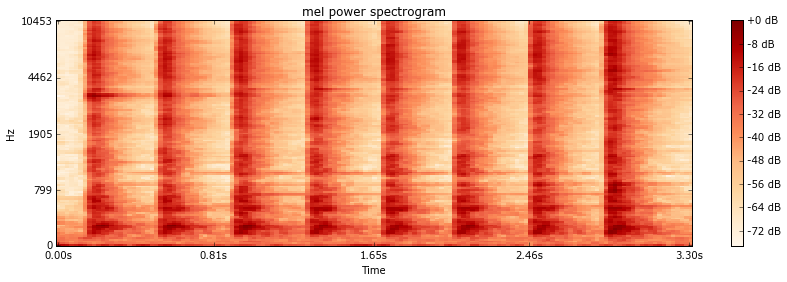

In [41]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

o_env = librosa.onset.onset_strength(y, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [42]:
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
onset_times  = librosa.frames_to_time(onset_frames[:], sr=sr)

(0.0, 144.0, 0.0, 26.082164485405805)

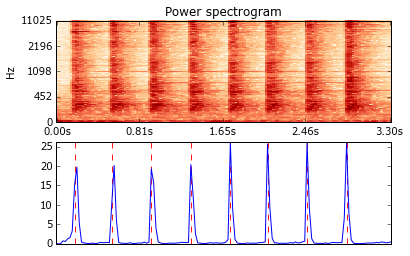

In [43]:
D = np.abs(librosa.stft(y))**2
plt.figure()

plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.logamplitude(D, ref_power=np.max), x_axis='time', y_axis='log')
plt.title('Power spectrogram')

plt.subplot(2, 1, 2)
plt.plot(o_env, label='Onset strength')
plt.vlines(onset_frames, 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
plt.xticks([])
plt.axis('tight')

In [44]:
onset_stfts = []
for frame in onset_frames:
    print np.abs(D[:, frame])
    onset_stfts.append(np.abs(D[:, frame]))

[ 0.01768714  0.05110858  0.01857717 ...,  0.00859519  0.01001581
  0.00406927]
[ 1.51173806  0.94878113  0.12624076 ...,  0.07501449  0.04729445
  0.00663006]
[ 0.01920492  0.09666563  0.05866603 ...,  0.07826883  0.13431519
  0.08398005]
[ 0.0051493   0.04362854  0.04406048 ...,  0.01379305  0.0013539
  0.00324963]
[  3.56014594e-02   3.25293504e-02   2.18997486e-02 ...,   3.99601609e-02
   8.35809205e-03   6.75837582e-05]
[ 0.03457832  0.01992394  0.00971687 ...,  0.02686478  0.04410262
  0.00759698]
[ 0.03005832  0.0522725   0.03002517 ...,  0.14971322  0.16797553
  0.13915689]
[  4.61350282e-05   2.89914920e-03   3.26015824e-03 ...,   4.65000011e-02
   7.72093013e-02   1.27157599e-01]


In [45]:
filename = raw_input()

hiHat.csv


In [46]:
with open('../data/' + filename, 'w+') as f:
    fw = csv.writer(f, delimiter=',')
    
    for i in range(len(onset_frames)):
        # onset_stfts is an array of ndarrays so we need to cast to list
        fw.writerow([onset_frames[i], onset_stfts[i].tolist()]) 